<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Access-and-Understanding,-Preprocessing" data-toc-modified-id="Data-Access-and-Understanding,-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Access and Understanding, Preprocessing</a></span></li><li><span><a href="#Required-Modules" data-toc-modified-id="Required-Modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Required Modules</a></span></li><li><span><a href="#Access-Data" data-toc-modified-id="Access-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Access Data</a></span></li><li><span><a href="#Understand-data" data-toc-modified-id="Understand-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Understand data</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-NaNs" data-toc-modified-id="Dealing-with-NaNs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dealing with NaNs</a></span></li><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Descriptive Statistics</a></span></li><li><span><a href="#Visualize-Data" data-toc-modified-id="Visualize-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualize Data</a></span><ul class="toc-item"><li><span><a href="#Univariate-Distribution" data-toc-modified-id="Univariate-Distribution-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Univariate Distribution</a></span></li><li><span><a href="#Correlation-between-features-and-target" data-toc-modified-id="Correlation-between-features-and-target-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Correlation between features and target</a></span></li><li><span><a href="#Pairwise-Correlations-between-features" data-toc-modified-id="Pairwise-Correlations-between-features-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Pairwise Correlations between features</a></span></li></ul></li><li><span><a href="#One-step-EDA-with-pandas_profiling" data-toc-modified-id="One-step-EDA-with-pandas_profiling-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>One-step EDA with pandas_profiling</a></span></li></ul></li><li><span><a href="#Transform-Data" data-toc-modified-id="Transform-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transform Data</a></span><ul class="toc-item"><li><span><a href="#Transform-categorical-data" data-toc-modified-id="Transform-categorical-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Transform categorical data</a></span><ul class="toc-item"><li><span><a href="#Mapping-of-ordinal-features-to-integers-according-to-their-ordering." data-toc-modified-id="Mapping-of-ordinal-features-to-integers-according-to-their-ordering.-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Mapping of ordinal features to integers according to their ordering.</a></span></li><li><span><a href="#Mapping-of-nominal-variables-to-integers" data-toc-modified-id="Mapping-of-nominal-variables-to-integers-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Mapping of nominal variables to integers</a></span></li><li><span><a href="#One-Hot-Encoding-of-nominal-features" data-toc-modified-id="One-Hot-Encoding-of-nominal-features-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>One-Hot-Encoding of nominal features</a></span></li></ul></li><li><span><a href="#Scaling-of-data" data-toc-modified-id="Scaling-of-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Scaling of data</a></span></li></ul></li></ul></div>

# Data Access and Understanding, Preprocessing 
* Author: Johannes Maucher
* Last Update: 06.07.2018

[Go to Workshop Overview (.ipynb)](Overview.ipynb) / [[.html]](Overview.html)

# Required Modules

In [1]:
%matplotlib inline
import pandas as pd
from IPython.display import display
from IPython.display import Image
import numpy as np
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(style="ticks")

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Access Data

In this workshop **regression models** are trained and evaluated by the example application **Estimation of rental bikes per day**. The task is to predict the daily count of rental bikes from features describing the weather situation and the date and season. The applied dataset is available from [UCI Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). After downloading and storing the corresponding .csv-file it can be accessed using *Pandas*:  

In [3]:
bikefile="./Data/bikeday.csv"
bikedf=pd.read_csv(bikefile,index_col=0,na_values=[" ","null"])
display(bikedf.head())

FileNotFoundError: [Errno 2] File ./Data/bikeday.csv does not exist: './Data/bikeday.csv'

Each of the 731 rows (2years) corresponds to one day. 

**Feature Description:**

- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

**Target:**

- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In our regression - experiments only *cnt* is applied as target value. The distinction into *casual* and *registered* is neglected. 



# Understand data
At the very beginning of each datamining task one should try to understand the given data. This task comprises:
- determine how *clean* the data is: Are there missing values, type-errors, value-errors (outliers), etc. 
- determine descriptive statistics
- investigate correlations

*Data visualistion* can help to clarify these questions.

## Dealing with NaNs
Pandas provides comfortable methods to determine and process missing data. In order to demonstrate this, we access a dummy .csv-file with missing values.

In [5]:
playdata1=pd.read_csv("nandata.csv")
display(playdata1)

,A,B,C,D
0,1.0,2.0,3,4
1,5.0,6.0,7,8
2,9.0,NaN,11,12
3,NaN,NaN,15,16


The number of missing data per column can be determined as follows:

In [6]:
playdata1.isnull().sum(axis=0)

A    1
B    2
C    0
D    0
dtype: int64

There is 1 missing value in column A, and there are 2 missing values in column B.

Now let's check if there are missing-values in the bike-share dataset:

In [7]:
bikedf.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are different approaches to handle missing values. For example, one can just remove all rows with missing values:

In [8]:
print(playdata1.dropna(axis=0))

     A    B  C  D
0  1.0  2.0  3  4
1  5.0  6.0  7  8


A less convenient approach is to remove all columns with missing values:

In [9]:
print(playdata1.dropna(axis=1))

    C   D
0   3   4
1   7   8
2  11  12
3  15  16


We can even remove only rows in which values of a defined subset of columns are missing: 

In [10]:
print(playdata1.dropna(subset=['A']))

     A    B   C   D
0  1.0  2.0   3   4
1  5.0  6.0   7   8
2  9.0  NaN  11  12


Pandas' *fillna()*-method can be applied for replacing NaNs by arbitrary values: 

In [11]:
print(playdata1.fillna(-99))

      A     B   C   D
0   1.0   2.0   3   4
1   5.0   6.0   7   8
2   9.0 -99.0  11  12
3 -99.0 -99.0  15  16


Another approach is to apply scikit-learn's [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)-class. In the example below missing values are filled with the mean-value of the column. Moreover, instead of filling in the *mean* it is also possible to choose *median* or *most_frequent*.

In [12]:
from sklearn.preprocessing import Imputer
fillerMean = Imputer(missing_values="NaN", strategy='mean', axis=0)
fillerMean.fit(playdata1)
dataImpMean = fillerMean.transform(playdata1.values)
print(dataImpMean)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9.  4. 11. 12.]
 [ 5.  4. 15. 16.]]


In [13]:
fillerMed = Imputer(missing_values='NaN', strategy='median', axis=0)
fillerMed.fit(playdata1)
dataImpMed = fillerMed.transform(playdata1.values)
print(dataImpMed)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9.  4. 11. 12.]
 [ 5.  4. 15. 16.]]


## Descriptive Statistics
The number of rows and columns of a Pandas dataframe can be determined by it's *shape*-parameter. The column-names are stored in the *columns*-parameter.

In [14]:
print("Number of rows:    ",bikedf.shape[0])
print("Number of columns: ",bikedf.shape[1])
print(bikedf.columns)

Number of rows:     731
Number of columns:  15
Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


**Basic descriptive statistics** of the dataframe's columns are calculated by the *describe()*-method:

In [15]:
print("Descriptive statistics on columns:")
display(bikedf.describe())

Descriptive statistics on columns:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Visualize Data
In order to understand data, a variety of different visualisation techniques can be applied, e.g. histograms, scatter-plots or box-plots.

### Univariate Distribution
Analysing the distribution of single attributes helps to understand data. For example it helps to detect outliers. Outliers should be removed from the data, since they may yield disturbed models. Moreover, knowing the univariate distribution may help us in determining necessary preprocessing steps, such as standardization. For classification tasks, the distribution of the class-labels within the training set is a critical point. In the case of extremely unbalanced label-distributions under- or oversampling can be applied for balancing. 

Univariate distributions can be visualized by e.g. histograms, boxplots or violinplots as demonstrated below in the code-cells below:

**Violinplot of bike-rentals per day.** The 3 violins refer to rentals from casual users, rentals from registered users and their sum.

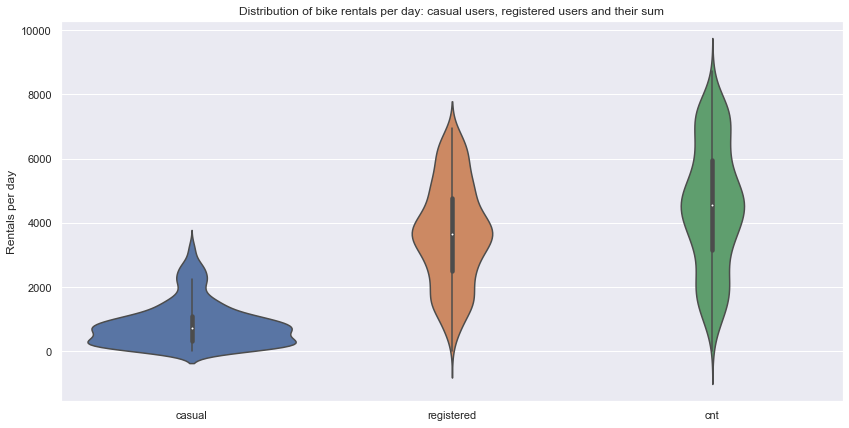

In [16]:
plt.figure(figsize=(14,7))
sb.set_style("darkgrid")
sb.set_context("notebook")
sb.violinplot(data=bikedf.iloc[:,-3:])
plt.title("Distribution of bike rentals per day: casual users, registered users and their sum")
plt.ylabel("Rentals per day")
plt.show()

**Boxplot of numeric features:**

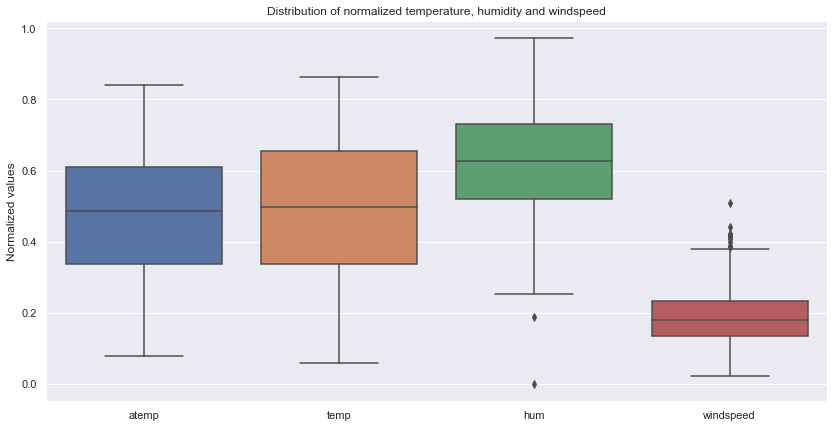

In [17]:
plt.figure(figsize=(14,7))
sb.set_style("darkgrid")
sb.boxplot(data=bikedf[["atemp","temp","hum","windspeed"]])
plt.title("Distribution of normalized temperature, humidity and windspeed")
plt.ylabel("Normalized values")
plt.show()

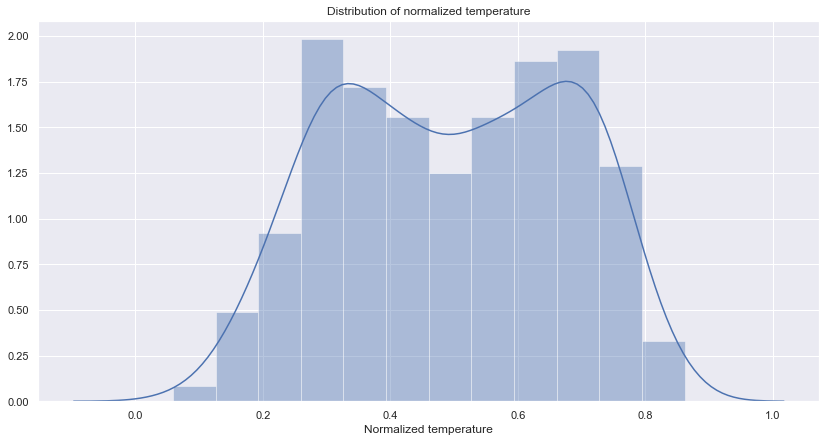

In [18]:
plt.figure(figsize=(14,7))
sb.set_style("darkgrid")
sb.distplot(bikedf["temp"])
plt.title("Distribution of normalized temperature")
plt.xlabel("Normalized temperature")
plt.show()

### Correlation between features and target
In order to analyse pairwise corelations of variables correlation plots are suitable. Below it is shown how to generate a matrix of correlation-plots with *Matplotlib*. In this example the correlation of a single input feature vs. the target variable *daily count of bikes* is plotted.

**Q: Which meaningful correlations are visible?**

In [19]:
print(bikedf.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


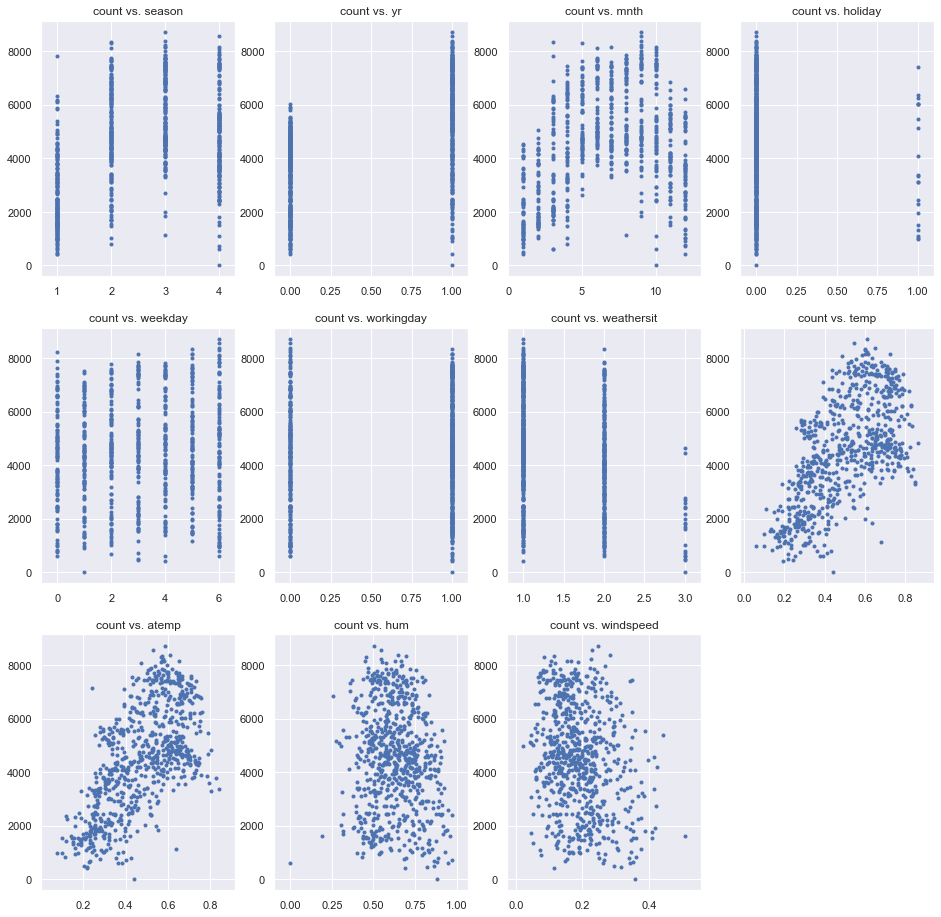

In [20]:
i=1
plt.figure(figsize=(16,16))
for feat in bikedf.columns[1:-3]:
    plt.subplot(3,4,i)
    x=bikedf[feat].values
    xmin=x.min()
    xmax=x.max()
    diff=(xmax-xmin)/(10.0)
    plt.plot(bikedf[feat].values,bikedf['cnt'].values,'.')
    plt.xlim(xmin-diff,xmax+diff)
    plt.title('count vs. '+feat)
    i+=1

### Pairwise Correlations between features

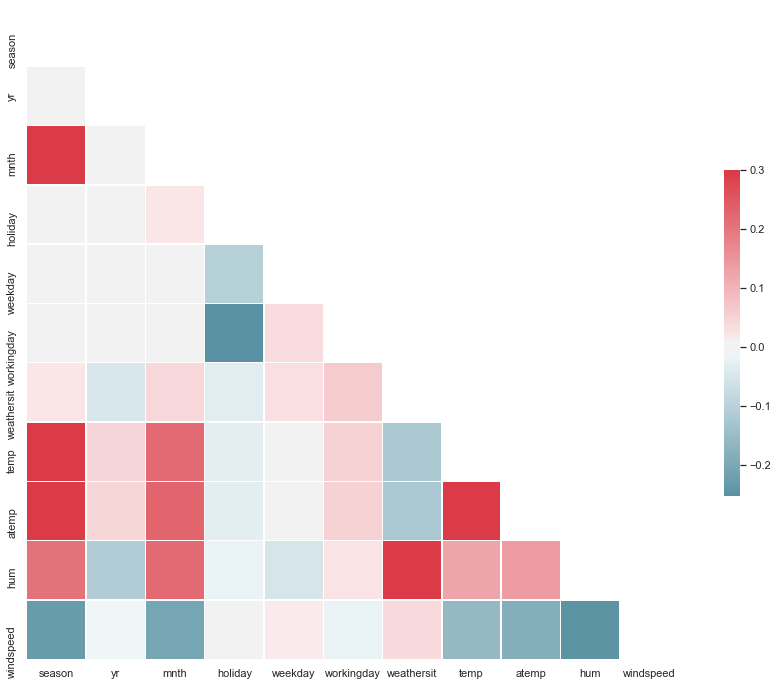

In [21]:
corrmat=bikedf.iloc[:,1:-3].corr()
plt.figure(figsize=(16,12))

sb.set_style("white") #set seaborn style
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(corrmat,mask=mask,cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## One-step EDA with pandas_profiling

In [24]:
#!pip install pandas_profiling

In [25]:
import pandas_profiling
eda=pandas_profiling.ProfileReport(bikedf)
#eda
eda.to_file(output_file="bikeRentalDailyEDA.html")

# Transform Data
Most machine learning algorithms require a vector of numeric values at their input. However, data is not always numerical. Therefore, corresponding transformation techniques to convert categorical data into suitable data-structures must be applied in the pre-processing phase.
## Transform categorical data

In [26]:
Image(filename='./Pics/dataTypes.png', width=300)

In the dataframe defined below, *color* and *type* are nominal features, *size* is an ordinal feature and *prize* is numerical.

In [49]:
df = pd.DataFrame([['pullover','blue', 'S', 39.90, 'sale'], ['short','red', 'L', 19.95, 'new'], ['shirt','green', 'M', 14.99, 'new'], ['shirt','blue', 'S', 11.99, 'new']])
df.columns = ['type','color', 'size', 'prize', 'class label']
df

,type,color,size,prize,class label
0,pullover,blue,S,39.90,sale
1,short,red,L,19.95,new
2,shirt,green,M,14.99,new
3,shirt,blue,S,11.99,new


### Mapping of ordinal features to integers according to their ordering. 
Since the ordering must be defined by the user, there can not be an automatic process for this. Instead a corresponding mapping, e.g. in form of a python-dictionary, must be defined. In the following code-snippet such a mapping and the replacement of the string-values by the corresponding integers in the dataframe is implemented.

In [50]:
size_mapping = {
    'L': 3,
    'M': 2,
    'S': 1}
df['size'] = df['size'].map(size_mapping)
display(df)
print("Type of columns: ",df.dtypes)

,type,color,size,prize,class label
0,pullover,blue,1,39.90,sale
1,short,red,3,19.95,new
2,shirt,green,2,14.99,new
3,shirt,blue,1,11.99,new


Type of columns:  type            object
color           object
size             int64
prize          float64
class label     object
dtype: object


The inverse mapping can be realised in a similar way:

In [51]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(inv_size_mapping)
df['size'] = df['size'].map(inv_size_mapping)
display(df)

{3: 'L', 2: 'M', 1: 'S'}


,type,color,size,prize,class label
0,pullover,blue,S,39.90,sale
1,short,red,L,19.95,new
2,shirt,green,M,14.99,new
3,shirt,blue,S,11.99,new


### Mapping of nominal variables to integers
The [LabelEncoder of scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) can be applied to transform non-numeric values of nominal variables to integers:

In [52]:
from sklearn.preprocessing import LabelEncoder
#import sklearn
X= df.values
display(df)
df['size'] = df['size'].map(size_mapping)

,type,color,size,prize,class label
0,pullover,blue,S,39.90,sale
1,short,red,L,19.95,new
2,shirt,green,M,14.99,new
3,shirt,blue,S,11.99,new


In [53]:
enclabel_type= LabelEncoder()
df['type'] = enclabel_type.fit_transform(X[:,0])
enclabel_color= LabelEncoder()
df['color'] = enclabel_color.fit_transform(X[:,1])
enclabel_class= LabelEncoder()
df['class label'] = enclabel_class.fit_transform(X[:,4])
display(df)

,type,color,size,prize,class label
0,0,0,1,39.90,1
1,2,2,3,19.95,0
2,1,1,2,14.99,0
3,1,0,1,11.99,0


The `classes_`-attribute of the *LabelEncoder*, defines the mapping from original value to the assigned integer. The i.th element of the `classes_`-list is the name of the original feature value:

In [54]:
print("Label Mapping of feature type:",enclabel_type.classes_)
print("Label Mapping of feature color:",enclabel_color.classes_)
print("Label Mapping of class:",enclabel_class.classes_)

Label Mapping of feature type: ['pullover' 'shirt' 'short']
Label Mapping of feature color: ['blue' 'green' 'red']
Label Mapping of class: ['new' 'sale']


The inverse mapping can be realized as follows:

In [55]:
newDf=df.copy()
newX=newDf.values
newDf['type'] = enclabel_type.inverse_transform(newX[:,0].astype(int))
newDf['color'] = enclabel_color.inverse_transform(newX[:,1].astype(int))
newDf['class label'] = enclabel_class.inverse_transform(newX[:,4].astype(int))

In [56]:
display(newDf)

,type,color,size,prize,class label
0,pullover,blue,1,39.90,sale
1,short,red,3,19.95,new
2,shirt,green,2,14.99,new
3,shirt,blue,1,11.99,new


### One-Hot-Encoding of nominal features

Now there are only numeric values, but is this a sufficient representation to train a machine learning algorithm?

The answer is: *No*! Usually machine learning algorithms expect continous input. They interpret the values to be ordered. In the example above this would mean that e.g. *pullover* is smaller than *shirt* and *pullover* is closer to *short* than to *shirt*. In order to avoid such miss-interpretations, nominal features are *One-Hot-encoded*. The [scikit-learn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) transforms each categorical feature with *m* possible values into *m* binary features, with only one active. As the following code snippet demonstrates, one can specify which features shall be one-hot encoded, by assigning the corresponding column-list to the *categorical_features*-parameter. By setting the parameter *sparse=False*, the transformed data is represented as a 2-dimensional numpy-array. Otherwise a sparse-representation would be calculated.   

In [57]:
from sklearn import compose, preprocessing
X= df.values
print(X)

[[ 0.    0.    1.   39.9   1.  ]
 [ 2.    2.    3.   19.95  0.  ]
 [ 1.    1.    2.   14.99  0.  ]
 [ 1.    0.    1.   11.99  0.  ]]


In [61]:
columnsToEncode=[0,1]

oheTransformer = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(categories="auto"), columnsToEncode), remainder="passthrough"
)
X = oheTransformer.fit_transform(X)
#print("Feature indices (i.th feature starts at the position specified in the i.th element of this vector) = ",oheTransformer.feature_indices_)
#print("Regular representation of One-Hot-Encoded Data:")
print(X)

[[ 0.    1.    1.    0.    0.    1.    1.    0.    0.    1.    0.    0.
   1.   39.9   1.  ]
 [ 1.    0.    0.    1.    1.    0.    1.    0.    1.    0.    0.    1.
   3.   19.95  0.  ]
 [ 1.    0.    0.    1.    1.    0.    0.    1.    0.    0.    1.    0.
   2.   14.99  0.  ]
 [ 1.    0.    0.    1.    1.    0.    0.    1.    0.    1.    0.    0.
   1.   11.99  0.  ]]


In the example above the first categorical variable is feature 0. There are 3 different values for this feature. Hence, OneHot-Encoding represents this single feature by 3 columns. For a value of 0 there is a 1 in the first column, for a value of 1, there is a 1 in the second column and for a value of 2 there is a 1 in the third column. The same procedure is performed for the second categorial feature at column 1 in the original array. This categorical feature also has 3 different values. The first 6 columns in the new array correspond to the 2 categorical features, the following columns are the features, which are not OneHot-encoded.

> **Note:** Above one-hot-encoding as provided by scikit-learn has been demonstrated. We will apply this function later on, when we build scikit-learn pipelines. The drawback of the scikit-learn function is that it doesn't regard column-names. In order to map the new columns to meaningful names, we implemented our own function `convert2OneHotFeatureNames()`. A better alternative would be the pandas function `get_dummies()`. It provides one-hot-encoding and a corresponding extension of column-names. The use of `get_dummies()` is demonstrated in the code-cell below. 

In [62]:
indfFOH=pd.get_dummies(df,columns=["type","color"])
display(indfFOH)

,size,prize,class label,type_0,type_1,type_2,color_0,color_1,color_2
0,1,39.90,1,1,0,0,1,0,0
1,3,19.95,0,0,0,1,0,0,1
2,2,14.99,0,0,1,0,0,1,0
3,1,11.99,0,0,1,0,1,0,0


## Scaling of data
Except decision trees and ensemble methods, which contain decision trees, nearly all machine learning algorithms require features of similar scale at the input. Since the value ranges of practical data can be very different a corresponding scaling must be performed in the preprocessing chain. The most common scaling approaches are *normalization (MinMax-scaling)* and *standardization*.

**Normalization:** In order to normalize feature *x* it's minimum $x_{min}$ and maximum $x_{max}$ must be determined. Then the normalized values $x_n^{(i)}$ are calculated from the original values $x^{(i)}$ by  
$$x_n^{(i)}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}.$$
The range of normalized values is $[0,1]$. A problem of this type of scaling is that in the case of outliers the value range of non-outliers may be very small. 

**Standardization:** In order to standardize feature *x* it's mean value $\mu_x$ and standard deviation $\sigma_x$ must be determined. Then the standardized values $x_s^{(i)}$ are calculated from the original values $x^{(i)}$ by
$$x_s^{(i)}=\frac{x^{(i)}-\mu_x}{\sigma_x}$$
All standardized features have zero mean and a standard deviation of one.

Create dataframe with 2 features:

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
rawdat = pd.DataFrame([[45,67000], [32,37500], [51,82500], [47,112000], [58,1800000]])
rawdat.columns = ['age', 'income p.a']
display(rawdat)

,age,income p.a
0,45,67000
1,32,37500
2,51,82500
3,47,112000
4,58,1800000


Normalize data:

In [64]:
normalizer = MinMaxScaler()
dat_norm = normalizer.fit_transform(rawdat.values)
print(dat_norm)

[[0.5        0.01673759]
 [0.         0.        ]
 [0.73076923 0.02553191]
 [0.57692308 0.0422695 ]
 [1.         1.        ]]


Standardize data:

In [69]:
standardizer = StandardScaler()
dat_stand = standardizer.fit_transform(rawdat.values)
print(dat_stand)

[[-0.18721455 -0.51091974]
 [-1.70833278 -0.55364121]
 [ 0.51484001 -0.48847287]
 [ 0.04680364 -0.44575141]
 [ 1.33390368  1.99878522]]
